In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
df = pd.read_csv('/content/netflix_titles_nov_2019.csv')

Esse desafio tem como objetivo responder algumas perguntas através da análise de dados, aprofundando o conhecimento em frequência e medidas.
Os dados que deverão ser utilizado nesse script foram baixados do kaggle, e podem ser acessados através do link:

https://www.kaggle.com/code/shivamb/netflix-shows-and-movies-exploratory-analysis

Este conjunto de dados consiste na lista de fi lmes e suas respectivas e suas informações.

Variáveis:

● show_id - id único do filme/série.

● title - título do filme ou série

● director - diretor do filme ou série

● cast - elenco do filme ou série

● country - país do filme ou série

● date_added - data que foi adicionado no Netflix

● reading score - ano de lançamento original do filme

● rating - classificação da televisão

● duration - duração total do filme ou série.

● listed_in - categoria ou gênero do filme ou série.

● description -descrição do filme ou série.

● type - tipo de filme ou série

Os dados são arquivos em .csv.

### 1. Exploração inicial:
○ Quantas linhas e colunas tem o dataset?


In [ ]:
df.shape

(5837, 12)

In [ ]:
print(f'O dataset tem {df.shape[0]} linhas e {df.shape[1]} colunas')

O dataset tem 5837 linhas e 12 colunas


○ Quais são os tipos das variáveis e se há valores ausentes?

In [ ]:
df.info

<bound method DataFrame.info of        show_id                                title  \
0     81193313                            Chocolate   
1     81197050  Guatemala: Heart of the Mayan World   
2     81213894                      The Zoya Factor   
3     81082007                            Atlantics   
4     80213643                      Chip and Potato   
...        ...                                  ...   
5832  70141644          Mad Ron's Prevues from Hell   
5833  70127998                             Splatter   
5834  70084180              Just Another Love Story   
5835  70157452                      Dinner for Five   
5836  70053412                 To and From New York   

                        director  \
0                            NaN   
1     Luis Ara, Ignacio Jaunsolo   
2                Abhishek Sharma   
3                      Mati Diop   
4                            NaN   
...                          ...   
5832                  Jim Monaco   
5833                   Joe Dante   
5834                Ole Bornedal   
5835                         NaN   
5836        Sorin Dan Mihalcescu   

                                                   cast  \
0     Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...   
1                                     Christian Morales   
2     Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...   
3     Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...   
4     Abigail Oliver, Andrea Libman, Briana Buckmast...   
...                                                 ...   
5832  Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...   
5833  Corey Feldman, Tony Todd, Tara Leigh, Erin Way...   
5834  Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...   
5835                                                NaN   
5836  Barbara King, Shaana Diya, John Krisiukenas, Y...   

                       country         date_added  release_year rating  \
0                  South Korea  November 30, 2019          2019  TV-14   
1                          NaN  November 30, 2019          2019   TV-G   
2                        India  November 30, 2019          2019  TV-14   
3     France, Senegal, Belgium  November 29, 2019          2019  TV-14   
4       Canada, United Kingdom                NaN          2019   TV-Y   
...                        ...                ...           ...    ...   
5832             United States   November 1, 2010          1987     NR   
5833             United States  November 18, 2009          2009  TV-14   
5834                   Denmark        May 5, 2009          2007     NR   
5835             United States   February 4, 2008          2007  TV-MA   
5836             United States    January 1, 2008          2006     NR   

       duration                                          listed_in  \
0      1 Season  International TV Shows, Korean TV Shows, Roman...   
1        67 min                Documentaries, International Movies   
2       135 min             Comedies, Dramas, International Movies   
3       106 min   Dramas, Independent Movies, International Movies   
4     2 Seasons                                           Kids' TV   
...         ...                                                ...   
5832     84 min                         Cult Movies, Horror Movies   
5833     29 min                                      Horror Movies   
5834    104 min                       Dramas, International Movies   
5835   1 Season                       Stand-Up Comedy & Talk Shows   
5836     81 min              Dramas, Independent Movies, Thrillers   

                                            description     type  
0     Brought together by meaningful meals in the pa...  TV Show  
1     From Sierra de las Minas to Esquipulas, explor...    Movie  
2     A goofy copywriter unwittingly convinces the I...    Movie  
3     Arranged to marry a rich man, young Ada is cru...    Movie  
4     Lovable pug Chip starts kindergarten, makes ne...  TV Show  
...                              

In [ ]:
df.isna().sum()

,0
show_id,0
title,0
director,1901
cast,556
country,427
date_added,642
release_year,0
rating,10
duration,0
listed_in,0


### 2. Análises de frequência:
○ Qual a proporção de filmes vs. séries no catálogo?


In [ ]:
df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


In [ ]:
total_linhas = df.shape[0]
total_linhas

5837

In [ ]:
total_filmes = df[df['type'] == 'Movie'].shape[0]
total_filmes

3939

In [ ]:
total_series = df[df['type'] == 'TV Show'].shape[0]
total_series

1898

In [ ]:
proporcao_filmes = (total_filmes / total_linhas) *100
proporcao_filmes

67.48329621380846

In [ ]:
proporcao_series = (total_series / total_linhas) *100
proporcao_series

32.516703786191535

In [ ]:
print(f'A proporção de filmes é de {proporcao_filmes:.2f}% e a proporção de séries é de {proporcao_series:.2f}%')

A proporção de filmes é de 67.48% e a proporção de séries é de 32.52%


○ Qual o gênero mais frequente?

In [ ]:
# Agrupa os gêneros e conta a frequência de cada um
cont_genero = df['listed_in'].str.split(', ', expand=True).stack().value_counts()
cont_genero

,count
International Movies,1797
Dramas,1488
Comedies,992
International TV Shows,966
Documentaries,658
TV Dramas,574
Action & Adventure,532
Independent Movies,516
TV Comedies,425
Crime TV Shows,355


In [ ]:
# Exibe o gênero mais frequente
print(f"O gênero mais frequente é: {cont_genero.index[0]} ({cont_genero.iloc[0]} vezes)")

O gênero mais frequente é: International Movies (1797 vezes)


### 3. Análises estatísticas:
○ Qual a média, mediana e moda do tempo de duração dos filmes?


In [ ]:
df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


In [ ]:
# Crie um novo DataFrame apenas com as linhas que contêm filmes
df_filmes = df[df['type'] == 'Movie']

# Exiba as primeiras linhas do novo DataFrame para verificação
print(df_filmes.head())

    show_id                                title                    director  \
1  81197050  Guatemala: Heart of the Mayan World  Luis Ara, Ignacio Jaunsolo   
2  81213894                      The Zoya Factor             Abhishek Sharma   
3  81082007                            Atlantics                   Mati Diop   
5  81172754                         Crazy people                Moses Inwang   
6  81120982                       I Lost My Body               Jérémy Clapin   

                                                cast  \
1                                  Christian Morales   
2  Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...   
3  Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...   
5  Ramsey Nouah, Chigul, Sola Sobowale, Ireti Doy...   
6  Hakim Faris, Victoire Du Bois, Patrick d'Assum...   

                    country         date_added  release_year rating duration  \
1                       NaN  November 30, 2019          2019   TV-G   67 min   
2                     

In [ ]:
# Converte a coluna 'duration' para numérico, tratando possíveis erros
df_filmes.loc[:, 'duration'] = df_filmes['duration'].astype(str).str.replace(' min', '').astype(float)


NameError: name 'df_filmes' is not defined

In [ ]:
df_filmes.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67.0,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135.0,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106.0,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
5,81172754,Crazy people,Moses Inwang,"Ramsey Nouah, Chigul, Sola Sobowale, Ireti Doy...",Nigeria,"November 29, 2019",2018,TV-14,107.0,"Comedies, International Movies, Thrillers",Nollywood star Ramsey Nouah learns that someon...,Movie
6,81120982,I Lost My Body,Jérémy Clapin,"Hakim Faris, Victoire Du Bois, Patrick d'Assum...",France,"November 29, 2019",2019,TV-MA,81.0,"Dramas, Independent Movies, International Movies","Romance, mystery and adventure intertwine as a...",Movie


In [ ]:
media = df_filmes['duration'].mean()
media

98.02919522721503

In [ ]:
mediana = df_filmes['duration'].median()
mediana

97.0

In [ ]:
moda = df_filmes['duration'].mode()
moda

,duration
0,90.0


○ Qual o filme mais curto e mais longo?


In [ ]:
df_filmes.sort_values('duration').reset_index(drop=True)
df_filmes.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67.0,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135.0,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106.0,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
5,81172754,Crazy people,Moses Inwang,"Ramsey Nouah, Chigul, Sola Sobowale, Ireti Doy...",Nigeria,"November 29, 2019",2018,TV-14,107.0,"Comedies, International Movies, Thrillers",Nollywood star Ramsey Nouah learns that someon...,Movie
6,81120982,I Lost My Body,Jérémy Clapin,"Hakim Faris, Victoire Du Bois, Patrick d'Assum...",France,"November 29, 2019",2019,TV-MA,81.0,"Dramas, Independent Movies, International Movies","Romance, mystery and adventure intertwine as a...",Movie


In [ ]:
filme_longo = df_filmes.loc[df_filmes['duration'].idxmax()]
filme_longo

,2160
show_id,80988062
title,Black Mirror: Bandersnatch
director,NaN
cast,"Fionn Whitehead, Will Poulter, Craig Parkinson..."
country,United States
date_added,"December 28, 2018"
release_year,2018
rating,TV-MA
duration,312.0
listed_in,"Dramas, International Movies, Sci-Fi & Fantasy"


In [ ]:
filme_curto = df_filmes.loc[df_filmes['duration'].idxmin()]
filme_curto

,1185
show_id,70304298
title,Silent
director,"Limbert Fabian, Brandon Oldenburg"
cast,NaN
country,United States
date_added,"June 4, 2019"
release_year,2014
rating,TV-Y7
duration,3.0
listed_in,"Children & Family Movies, Sci-Fi & Fantasy"


### 4. Visualização de dados:
○ Criar um gráfico de barras para mostrar a quantidade de títulos por gênero.


In [ ]:
# Contagem dos gêneros
cont_genero

,count
International Movies,1797
Dramas,1488
Comedies,992
International TV Shows,966
Documentaries,658
TV Dramas,574
Action & Adventure,532
Independent Movies,516
TV Comedies,425
Crime TV Shows,355


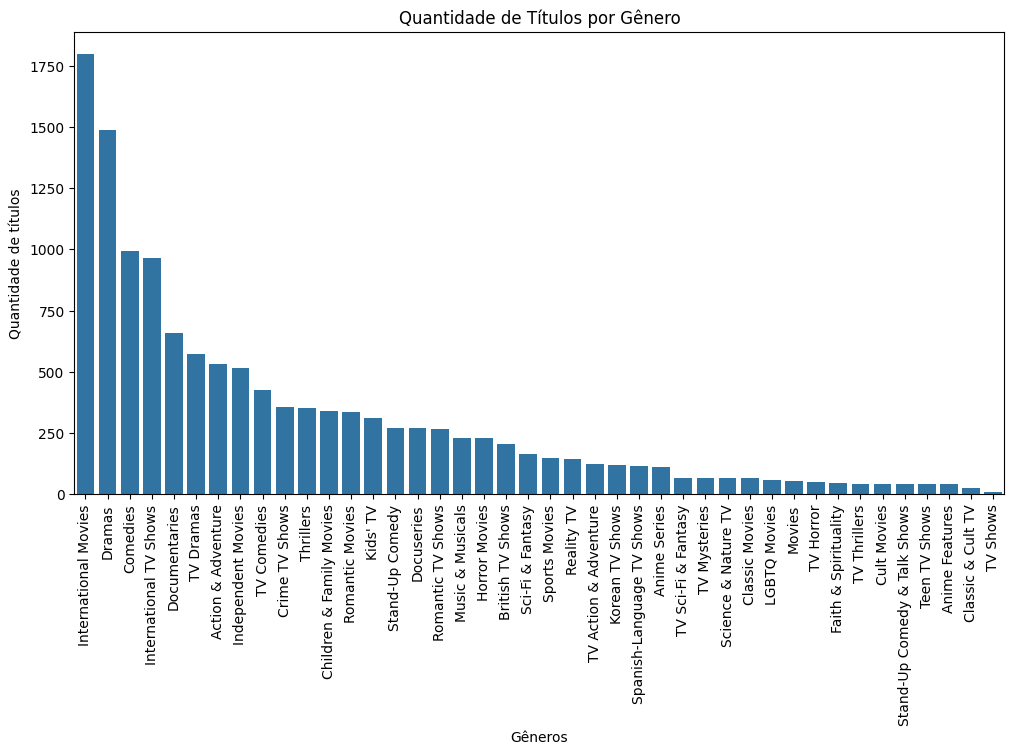

In [ ]:
# Criando o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=cont_genero.index, y=cont_genero.values)
plt.xticks(rotation=90)
plt.xlabel("Gêneros")
plt.ylabel("Quantidade de títulos")
plt.title("Quantidade de Títulos por Gênero")
plt.show()

○ Criar um histograma para analisar a distribuição da duração dos filmes.

In [ ]:
df_filmes.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67.0,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135.0,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106.0,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
5,81172754,Crazy people,Moses Inwang,"Ramsey Nouah, Chigul, Sola Sobowale, Ireti Doy...",Nigeria,"November 29, 2019",2018,TV-14,107.0,"Comedies, International Movies, Thrillers",Nollywood star Ramsey Nouah learns that someon...,Movie
6,81120982,I Lost My Body,Jérémy Clapin,"Hakim Faris, Victoire Du Bois, Patrick d'Assum...",France,"November 29, 2019",2019,TV-MA,81.0,"Dramas, Independent Movies, International Movies","Romance, mystery and adventure intertwine as a...",Movie


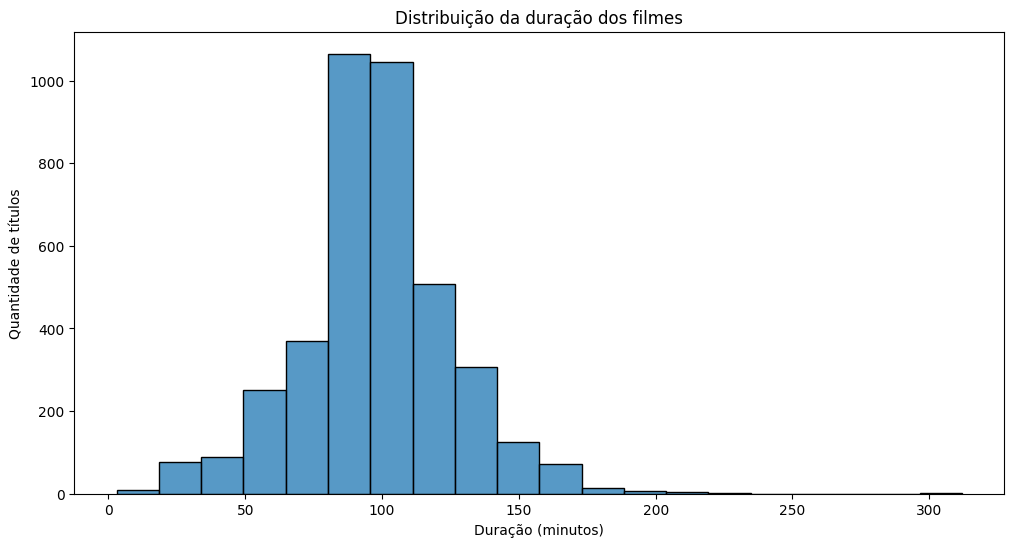

In [ ]:
# Criar o histograma da duração dos filmes
plt.figure(figsize=(12, 6))
sns.histplot(df_filmes['duration'], bins=20)

# Configurações do gráfico
plt.xlabel("Duração (minutos)")
plt.ylabel("Quantidade de títulos")
plt.title("Distribuição da duração dos filmes")
plt.show()

### Atividade extra:
● Quais são os 5 países que possuem mais produções no catálogo?

In [ ]:
# Contar a frequência de cada país
cont_paises = df['country'].value_counts()

In [ ]:
# Obter os 5 países com mais produções
top_5 = cont_paises.head(5)

In [ ]:
# Imprimir os resultados
print("Os 5 países com mais produções no catálogo são:")
top_5

Os 5 países com mais produções no catálogo são:


,count
country,
United States,1907
India,697
United Kingdom,336
Japan,168
Canada,139
